In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn
import pickle

**Подготовка данных для обучения**

In [2]:
data = pd.read_csv("/content/ДЗ_2_Прогнозирование_оценки_за_экз_по_ТОЭ.csv")

In [3]:
data.drop("Отметка времени", axis=1, inplace = True)

In [4]:
data.drop(index=8)

,Итоговая оценка за экзамен по ТОЭ,"С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)","Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?",Оценка по физике в школе,Оценка по физике в последнем семестре?,Оценка за ИДЗ по ТОЭ за семестр,Оценка по лабораторным ТОЭ,Вели конспект по занятиям? (лекции и/или практики),Выходили к доске на практике?,Оценка за последнюю контрольную работу по ТОЭ,В течении предыдущего семестра были трудоустроены и/или проходили стажировку?,"Если работали/проходили стажировку, то какая ставка (загрузка):",Где проживаете?,"Есть кот дома? (в месте, где сейчас живете)",Есть родной брат/сестра?,Гражданство,Сколько в среднем играли в прошлом семестре? Укажите число в часах,Была ли стипендия в 3 семестре?,Оцените свое ментальное здоровье в прошлом семестре,"Оцените, насколько были истощены (уставши) к началу сессии"
0,5.0,1.0,75,5,5.0,5.0,5.0,да,да,5,нет,0.00,общежитие 8,нет,да,KAZ,10,да,9,1
1,3.0,1.0,75,4,5.0,4.0,5.0,да,нет,3,нет,0.00,дома,нет,да,RUS,20,нет,7,6
2,3.0,1.0,75,5,4.0,5.0,5.0,да,нет,5,да,0.25,дома,да,да,RUS,168,да,7,3
3,3.0,1.0,75,5,4.0,4.0,4.0,нет,нет,4,да,0.50,общежитие 8,нет,да,KAZ,18,нет,7,2
4,4.0,1.0,100,4,3.0,4.0,5.0,нет,нет,5,нет,NaN,дома,нет,да,RUS,20,нет,10,5
5,3.0,1.0,75,4,3.0,3.0,5.0,да,нет,3,да,0.50,дома,нет,нет,RUS,2,нет,4,8
6,3.0,2.0,25,3,3.0,3.0,3.0,нет,нет,3,да,0.50,дома,да,да,RUS,1,нет,1,8
7,3.0,1.0,25,5,3.0,5.0,5.0,нет,да,5,нет,0.00,Общежитие 7,нет,да,BLR,2,нет,10,0
9,5.0,1.0,50,5,5.0,5.0,5.0,да,да,5,нет,0.00,дома,нет,нет,KAZ,6-10 в день)),да,6,8
10,4.0,2.0,100,4,5.0,5.0,4.0,да,нет,5,нет,NaN,дома,нет,да,RUS,NaN,да,9,7


In [5]:
Y = data["Итоговая оценка за экзамен по ТОЭ"]
Y = Y.fillna(0)
data = data.fillna(0)

In [6]:
data.drop("Гражданство", axis=1, inplace = True)
data.drop("Где проживаете?", axis=1, inplace = True)

In [7]:
data = data[:].replace({"да": 1, "нет": 0,"2 часа в день": 2, "6-10 в день))": 8,
                 "В компьютер? Или, предположим, в волейбол?": 0, "0,1": 0.1,
                 "Больше 500 часов": 500,
                 "2-3 часа в день": 2.5,
                 "1 час": 1,
                "-": 0}).astype(float)

<ipython-input-7-8e5f74606fe3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data[:].replace({"да": 1, "нет": 0,"2 часа в день": 2, "6-10 в день))": 8,


**Корреляция**

In [8]:
corr_matrix = data.corr()
target_corr = corr_matrix['Итоговая оценка за экзамен по ТОЭ'].sort_values(ascending=False)
print(target_corr)

Итоговая оценка за экзамен по ТОЭ                                                                                          1.000000
Оценка за ИДЗ по ТОЭ за семестр                                                                                            0.721130
Оценка по лабораторным ТОЭ                                                                                                 0.660584
Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?    0.598033
Была ли стипендия в 3 семестре?                                                                                            0.431341
Выходили к доске на практике?                                                                                              0.344403
Вели конспект по занятиям? (лекции и/или практики)                                                                         0.335572
Оцените, насколько были истощены (уставши) к началу сессии                  

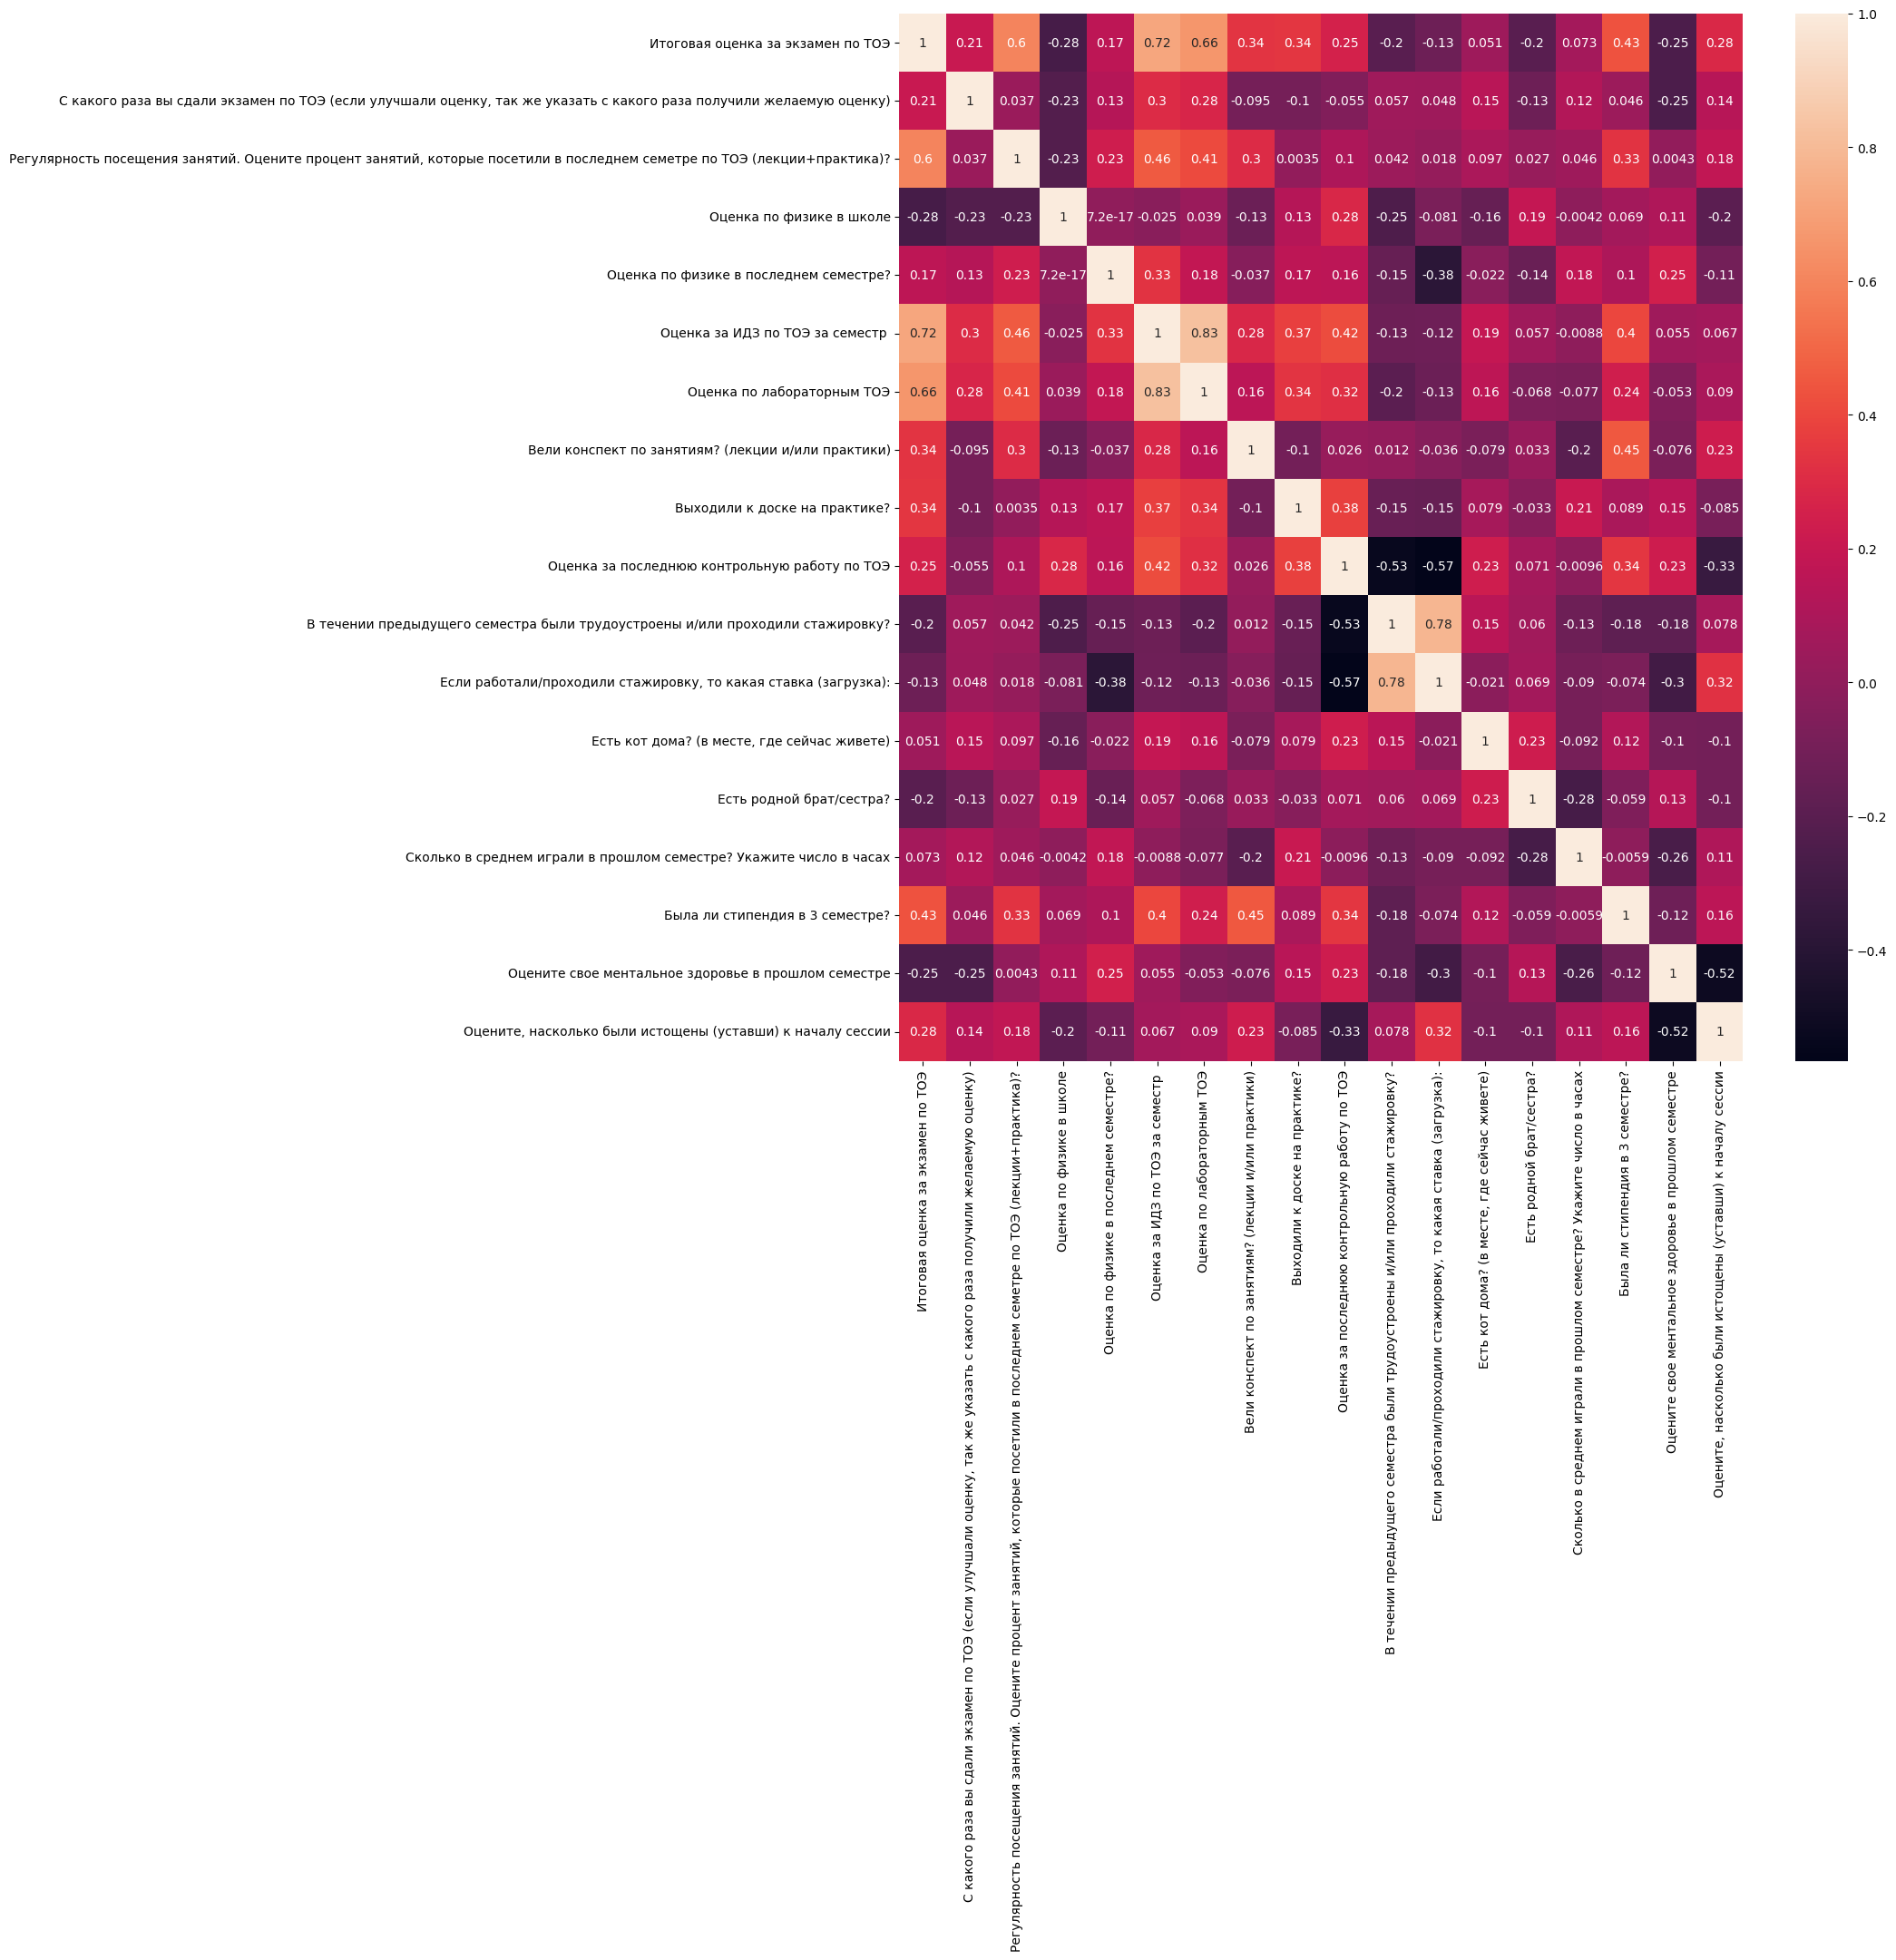

In [9]:
plt.figure(figsize=(15,15))
seaborn.heatmap(corr_matrix, annot = True)
plt.show()

**Обучение**

In [10]:
data.drop("Итоговая оценка за экзамен по ТОЭ", axis=1, inplace=True)

In [11]:
X = data[["Оценка по лабораторным ТОЭ","Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?",
         "Оценка за ИДЗ по ТОЭ за семестр "]]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=25, shuffle = True)

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.3331306951563943
R^2 Score: 0.4603282738466412


In [17]:
filename = "LinearRegr_model.sav"
pickle.dump(model, open(filename, "wb"))